<div style = "background-color: orange; text-align: center; border-radius: 13px 83px; line-height:25px; padding: 13px;">
    <b style = "color: #8B0000; font-size: 50px; font-family: calibri;">
        Step 1
    </b>
    <span style = "margin-bottom : 10px; margin-top: 10px; display : inline-block; font-family:Berlin Sans FB; font-size:35px; ">
        Importing necessary libraries and functions required for project success
    </span>
</div>



In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import expon

<div style = "background-color: orange; text-align: center; border-radius: 13px 83px; line-height: 25px; padding: 13px;">
    <b style = "color: #8B0000; font-size : 50px; font-family: calibri;">
    Step 2
    </b><br>
    <span style = "font-family: berlin sans fb; font-size: 35px; margin-top : 10px; display : inline-block">
        Data Loading and Inspection
    </span>
</div>

In [21]:
#using pandas to read in csv file
df = pd.read_csv("C:/Users/DELL/Desktop/Projects/Datasets/train.csv", index_col = 0)
#converting column name case to lower case
df.columns = df.columns.str.lower()


In [3]:
#display first five rows of dataset
df.head()

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
#showing dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order id       9800 non-null   object 
 1   order date     9800 non-null   object 
 2   ship date      9800 non-null   object 
 3   ship mode      9800 non-null   object 
 4   customer id    9800 non-null   object 
 5   customer name  9800 non-null   object 
 6   segment        9800 non-null   object 
 7   country        9800 non-null   object 
 8   city           9800 non-null   object 
 9   state          9800 non-null   object 
 10  postal code    9789 non-null   float64
 11  region         9800 non-null   object 
 12  product id     9800 non-null   object 
 13  category       9800 non-null   object 
 14  sub-category   9800 non-null   object 
 15  product name   9800 non-null   object 
 16  sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [6]:
# converting postal code datatype to become integer
df['postal code'] = df['postal code'].astype('Int64')

In [22]:
#this loop converts columns in the date_Col list to datatime datatype
date_col = ['order date', 'ship date']
for col in date_col:
    df[col] = pd.to_datetime(df[col], format = '%d/%m/%Y')

In [8]:
#this loop shows the number of unique values per column in the cat_col list 
cat_col = [
    'ship mode', 'customer id', 'segment', 
    'country', 'city', 'state', 'region', 
    'category', 'sub-category', 'product id', 'product name'
] 
for col in cat_col:
    print(df[col].nunique())

4
793
3
1
529
49
4
3
17
1861
1849


In [9]:
#this loop converts columns in the cat_col list to  category datatype
for col in cat_col:
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order id       9800 non-null   object        
 1   order date     9800 non-null   datetime64[ns]
 2   ship date      9800 non-null   datetime64[ns]
 3   ship mode      9800 non-null   category      
 4   customer id    9800 non-null   category      
 5   customer name  9800 non-null   object        
 6   segment        9800 non-null   category      
 7   country        9800 non-null   category      
 8   city           9800 non-null   category      
 9   state          9800 non-null   category      
 10  postal code    9789 non-null   Int64         
 11  region         9800 non-null   category      
 12  product id     9800 non-null   category      
 13  category       9800 non-null   category      
 14  sub-category   9800 non-null   category      
 15  product name   9800 non-nu

In [13]:
#checking for missing values
df.isna().sum().sort_values(ascending = False).to_frame('Missing values')

,Missing values
postal code,11
order id,0
state,0
product name,0
sub-category,0
category,0
product id,0
region,0
city,0
order date,0


In [14]:
#analyzing columns with missing values
df[df['postal code'].isna()]

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
Row ID,,,,,,,,,,,,,,,,,
2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,<NA>,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,<NA>,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [15]:
df[df['state'] == 'Vermont']

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
Row ID,,,,,,,,,,,,,,,,,
2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,<NA>,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,<NA>,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,<NA>,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,<NA>,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [16]:
#filling missing values witha place holder
df['postal code'] = df['postal code'].fillna(0)

### Handling Missing Values in the Postal Code Column
The `postal code` column contained missing values in the dataset. These missing values were replaced with `0` to:
1. Maintain the structure and consistency of the dataset.
2. Indicate the absence of a postal code without introducing potential bias or assumptions by imputing incorrect values.

Please note that `0` is used as a placeholder and does not represent a valid postal code. This ensures that analyses dependent on this column, if any, are handled appropriately.


In [17]:
#cross checking for missing values
df.isna().sum()

order id         0
order date       0
ship date        0
ship mode        0
customer id      0
customer name    0
segment          0
country          0
city             0
state            0
postal code      0
region           0
product id       0
category         0
sub-category     0
product name     0
sales            0
dtype: int64

In [18]:
#checking for duplicates
duplicates = df.duplicated()
duplicates.sum()

1

In [23]:
#displaying duplicates
df[df.duplicated(keep = False)]

,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
Row ID,,,,,,,,,,,,,,,,,
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3407,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [24]:
#droping duplicates
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

In [26]:
#running descriptive analysis for dataset
df.describe()

,order date,ship date,postal code,sales
count,9799,9799,9788.000000,9799.000000
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,55274.552922,230.763895
min,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,23223.000000,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.480000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.572000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,NaN,NaN,32042.628986,626.683644


In [27]:
#running descriptive analysis for dataset
df.describe(include = ['object', 'category'])

,order id,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name
count,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799
unique,4922,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5858,35,35,5101,9799,891,1946,3140,19,5909,1492,47


<div style = "background-color: orange; text-align: center; border-radius: 13px 83px; line-height: 25px; padding: 13px;">
    <b style = "color: #8B0000; font-size : 50px; font-family: calibri;">
    Step 3
    </b><br>
    <span style = "font-family: berlin sans fb; font-size: 35px; margin-top : 10px; display : inline-block">
        Exploratory Data Analysis And Recommendations
    </span>
</div>

# Identifying the top and bottom-performing product categories and subcategories based on sales 

# Category

In [29]:
#descriptive analysis
category_describe = df.groupby('category')['sales'].describe().sort_values(by = 'count')
category_describe

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Technology,1813.0,456.401474,1116.818701,0.990,67.98,167.944,453.576,22638.480
Furniture,2077.0,350.687147,501.607681,1.892,47.12,182.550,435.260,4416.174
Office Supplies,5909.0,119.381001,383.761427,0.444,11.76,27.360,79.470,9892.740


In [30]:
#descriptive analysis
cat_sales = df.groupby('category')['sales'].sum().to_frame().sort_values( 'sales', ascending = False).reset_index()
cat_sales

,category,sales
0,Technology,827455.8730
1,Furniture,728377.2037
2,Office Supplies,705422.3340


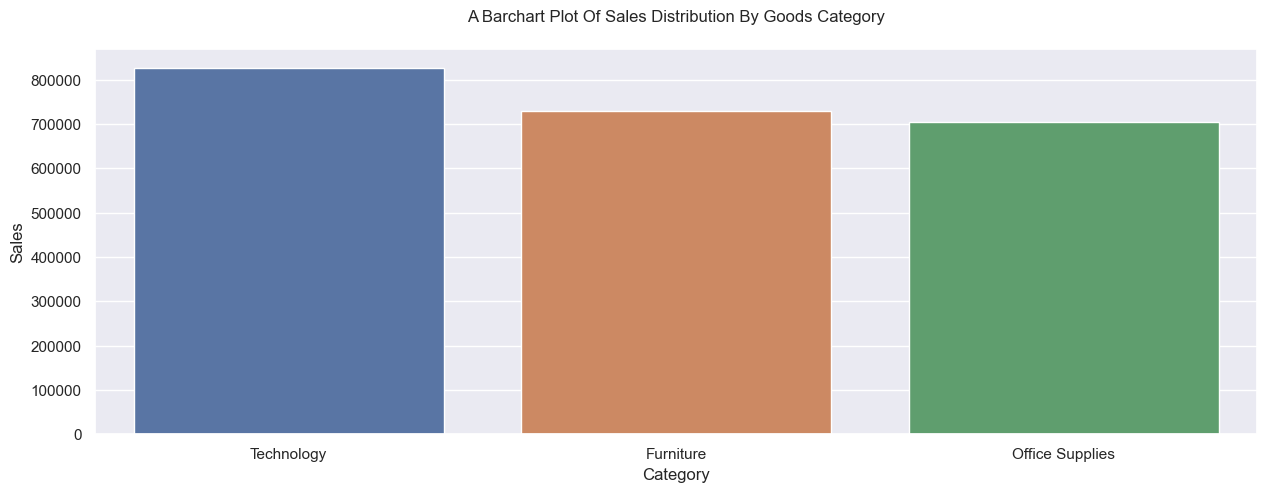

In [33]:
#barchart plot 
plt.figure(figsize = (15,5))
sns.barplot(
    data = cat_sales,
    x = 'category',
    y = 'sales',
    order = cat_sales['category']
)
plt.title('A Barchart Plot Of Sales Distribution By Goods Category', pad = 20)
plt.xlabel('Category')
plt.ylabel('Sales($)')
plt.show()

From the descriptive analysis and Barchart above I am able to gather insights that:
1. More items from the office supplies category have been sold probably because they are cheaper. 
2. The technology category registered the least count of items sold reasons this could be due to the high cost of these products though these technology products have proven to bring in more income for the business.
3. Now using these analysis above I identified the Technology category to be the top performing category and Office supplies to be the bottom performing category based on sales.
   

# Sub-category

In [35]:
sub_cat_describe = df.groupby('sub-category')['sales'].describe().sort_values(by = 'count')
sub_cat_describe

,count,mean,std,min,25%,50%,75%,max
sub-category,,,,,,,,
Copiers,66.0,2215.880212,3216.185499,299.990,609.98450,1099.98000,2299.96000,17499.950
Machines,115.0,1645.553313,2765.102088,11.560,287.93900,599.98500,2120.93800,22638.480
Supplies,184.0,252.284283,938.087746,1.744,12.55350,27.64500,55.27600,8187.650
Fasteners,214.0,14.027850,12.466864,1.240,5.68500,10.58400,17.90000,93.360
Bookcases,226.0,503.598224,641.419280,35.490,187.53200,304.45725,520.01125,4404.900
Envelopes,248.0,65.032444,85.170691,1.632,15.12750,28.57600,71.90250,604.656
Tables,314.0,645.893720,598.584981,24.368,244.15825,450.39000,872.55500,4297.644
Labels,357.0,34.587468,74.802711,2.088,8.26000,14.94000,28.91000,786.480
Appliances,459.0,227.926804,378.006735,0.444,35.15400,83.42000,241.44000,2625.120


In [36]:
sub_cat_sales = df.groupby('sub-category')['sales'].sum().to_frame().sort_values( 'sales', ascending = False).reset_index()
sub_cat_sales

,sub-category,sales
0,Phones,327782.4480
1,Chairs,322541.3590
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


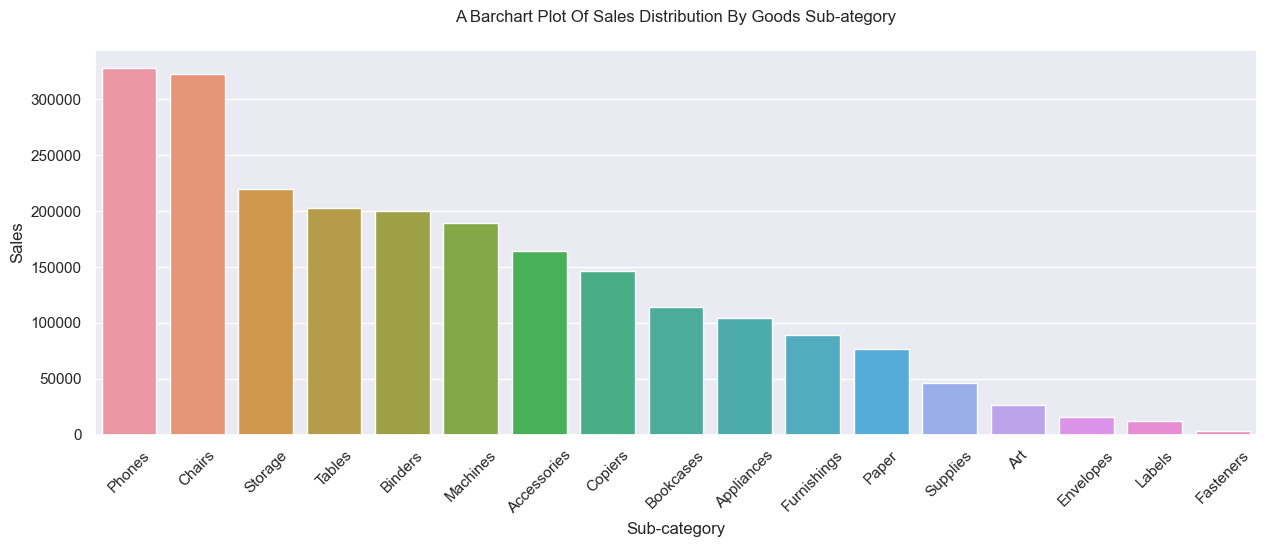

In [41]:
#barchart plot 
plt.figure(figsize = (15,5))
sns.barplot(
    data = sub_cat_sales,
    x = 'sub-category',
    y = 'sales',
    order=sub_cat_sales['sub-category']
)
plt.title('A Barchart Plot Of Sales Distribution By Goods Sub-ategory', pad = 20)
plt.xlabel('Sub-category')
plt.ylabel('Sales($)')

plt.xticks( rotation = 45)
plt.show()

From the descriptive analysis and barchart above I have been able to gather the following insights about this dataset which are :
1. Copiers is the most expensive category due to the high average price and standard deviation which shows how spread out

   other prices are from the mean
3. The Fasteners sub category is the cheapest and also the bottom performing product by sales the price at which it is sold

   can probably be due to the low buying rate from customers
5. The phones sub-category ranks as the top performing product by sales even with it's high price rate

# Identify the top and bottom performing product category and sub-category based on number of items sold out

# Category

In [39]:
#value count for category column
product_category_count = df['category'].value_counts().to_frame()
product_category_count

,count
category,
Office Supplies,5909
Furniture,2077
Technology,1813


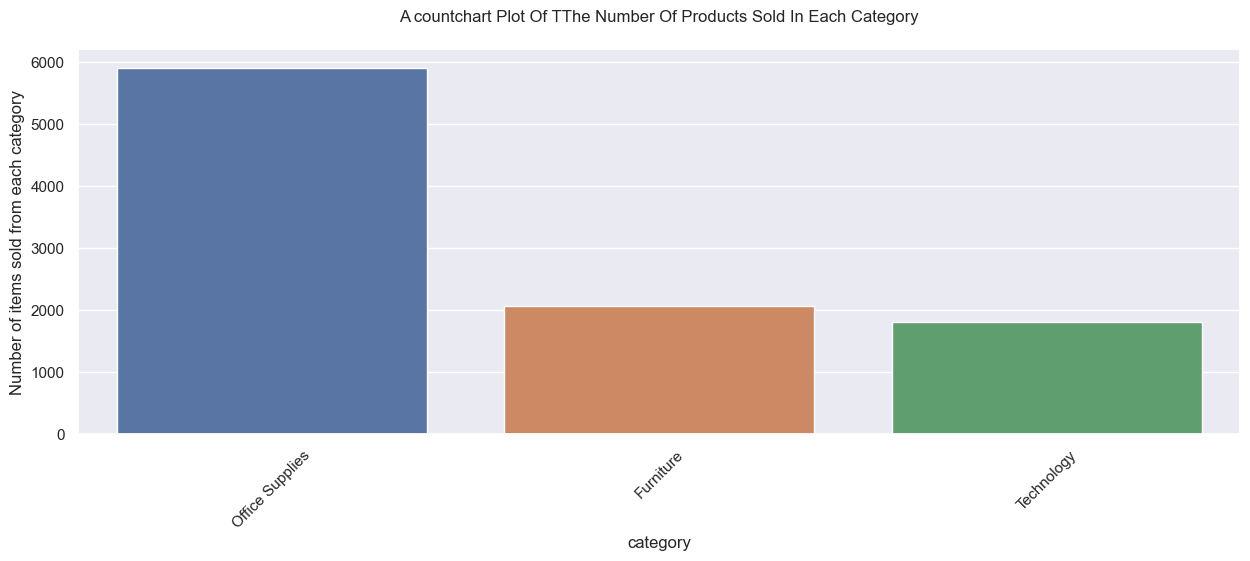

In [43]:
#countchart plot 
plt.figure(figsize = (15, 5))
sns.countplot(
    x = df['category'],
    order = product_category_count.index[:]
)
plt.title('A countchart Plot Of TThe Number Of Products Sold In Each Category', pad = 20)
plt.xlabel('category')
plt.ylabel('Number of items sold from each category')
plt.xticks(rotation = 45)
plt.show()

The barchart and analysis above has show that:
1. The office supplies category has a higher count of items sold out making it the top performing category by sale count.
2. The Technology category has a lower count of items sold out thus making it the bottom performing category by sale count.

In [44]:
#value count for subcategory
product_subcategory_count = df['sub-category'].value_counts().to_frame()
product_subcategory_count

,count
sub-category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,606
Appliances,459


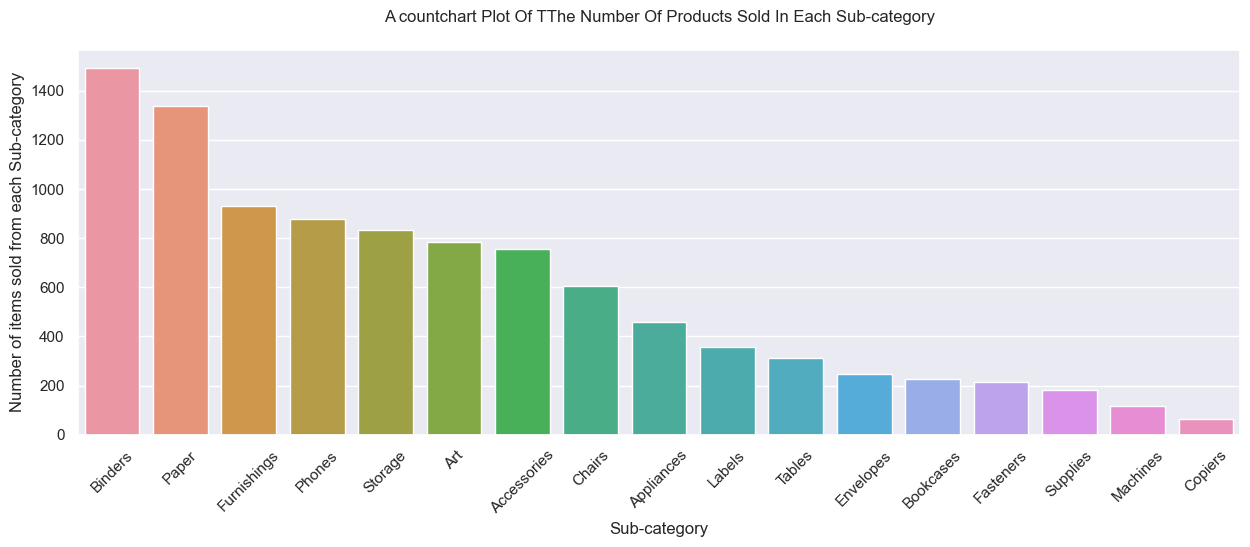

In [45]:
#counthart plot 
plt.figure(figsize = (15, 5))
sns.countplot(
    x = df['sub-category'],
    order = product_subcategory_count.index[:]
)
plt.title('A countchart Plot Of TThe Number Of Products Sold In Each Sub-category', pad = 20)
plt.xlabel('Sub-category')
plt.ylabel('Number of items sold from each Sub-category')
plt.xticks(rotation = 45)
plt.show()

The barchart and analysis above has show that:
1. The Binders sub-category has a higher count of items sold out making it the top performing category by sale count.
2. The Copiers sub-category has a lower count of items sold out thus making it the bottom performing category by sale count.
   This could be due to the high cost of products under this category.

# Analyze sales trend across different regions. Highlight which regions are performing best and which require attention.

In [46]:
#creating a new column called year
df['year'] = df['order date'].dt.year

In [47]:
#descriptive analysis
region_year_describe = df.groupby(['region', 'year'])['sales'].describe().reset_index()
region_year_describe

,region,year,count,mean,std,min,25%,50%,75%,max
0,Central,2015,455.0,226.198946,686.670268,0.876,12.950,37.840,212.45000,9449.950
1,Central,2016,474.0,216.086862,435.695242,0.984,15.952,56.007,222.04400,4899.930
2,Central,2017,591.0,246.487107,909.762559,0.836,14.740,47.992,191.52750,17499.950
3,Central,2018,757.0,187.090278,410.410147,0.444,14.400,44.400,182.94000,5443.960
4,East,2015,505.0,252.220687,596.896711,0.852,17.856,55.480,196.21000,6999.960
5,East,2016,626.0,244.768663,519.276332,1.240,17.940,52.236,234.49100,4643.800
6,East,2017,745.0,239.612803,653.097554,1.504,18.192,59.520,232.40000,9099.930
7,East,2018,908.0,231.419808,685.863192,1.188,17.424,51.443,196.22250,11199.968
8,South,2015,344.0,300.508446,1300.398726,1.167,15.135,47.799,214.50600,22638.480
9,South,2016,330.0,212.351765,528.713270,1.780,17.450,57.510,185.63250,6354.950


In [48]:
# Summarize sales and profit by year and region
trends = df.groupby(['year', 'region'])['sales'].sum().reset_index()
trends

,year,region,sales
0,2015,Central,102920.5206
1,2015,East,127371.4470
2,2015,South,103374.9055
3,2015,West,145907.9630
4,2016,Central,102425.1724
5,2016,East,153225.1830
6,2016,South,70076.0825
7,2016,West,133709.5675
8,2017,Central,145673.8800
9,2017,East,178511.5380


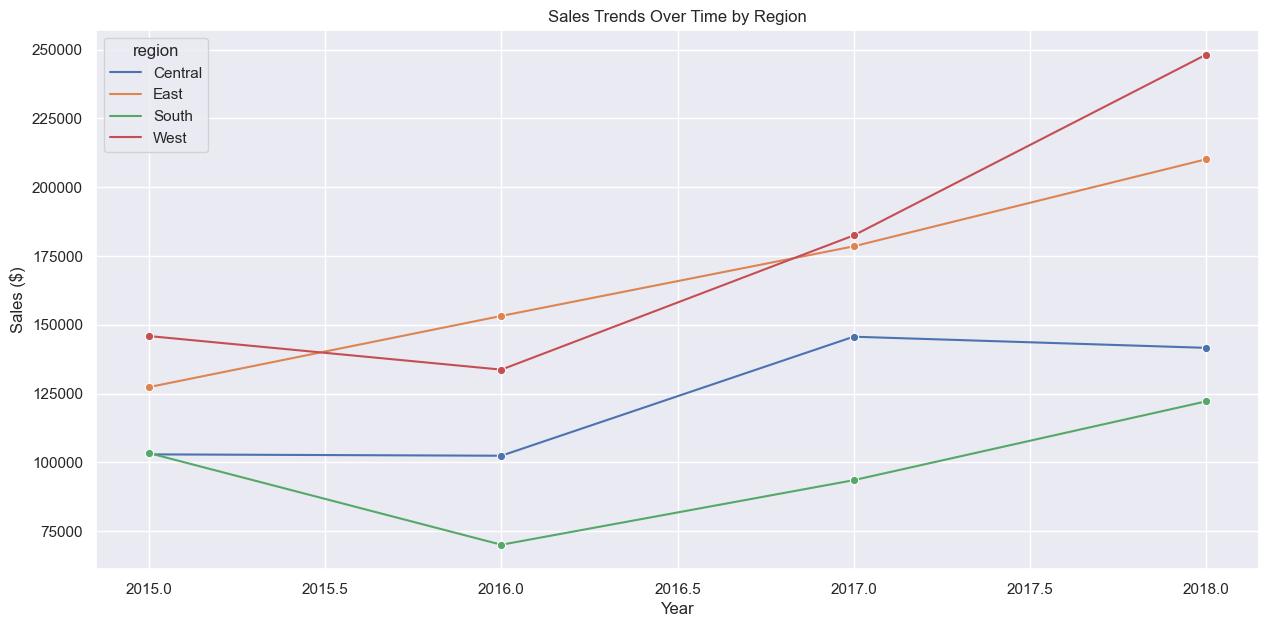

In [49]:
# Plot sales trends over time for each region
plt.figure(figsize=(15, 7))
sns.lineplot(
    data=trends,
    x='year', 
    y='sales', 
    hue='region', 
    marker='o'
)
plt.title('Sales Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

Based on the descriptive statistics and line plot provided above which examines Regional Sales Trends from 2015-2018 I found the following insights:

Central Region:

Transaction Volume: The Central region experienced a steady increase in the number of transactions over the years, growing from 455 in 2015 to 757 in 2018.
Average Sales: Despite the increased volume, the average sales per transaction declined from a peak mean of 246.49 in 2017 to 187.09 in 2018. This indicates that while more transactions occurred, their individual values were decreasing.
Sales Variability: The standard deviation peaked in 2017 (909.76), reflecting higher variability in sales values, likely due to a mix of high and low-value transactions. In 2018, variability decreased (std of 410.41), suggesting more consistent but lower-value transactions.
Key Takeaway: The Central region's growth in transaction counts contrasts with a reduction in sales value per transaction. Strategies to boost average sales value could be beneficial.

East Region:

Transaction Volume: The number of transactions increased consistently, reaching a high of 908 in 2018.
Average Sales: The mean sales values remained relatively stable over the years, hovering between 231.42 and 252.22. This indicates steady sales performance.
Sales Variability: Standard deviation shows a gradual increase, with a peak in 2018 (685.86), indicating a growing diversity in transaction values.
Key Takeaway: The East region has maintained steady sales performance with a notable increase in transaction diversity, suggesting room for both high-value and low-value sales opportunities.

South Region:

Transaction Volume: The South region experienced growth in transaction count from 344 in 2015 to 513 in 2018.
Average Sales: Mean sales values peaked in 2016 (252.13) but saw a decline to 238.14 in 2018.
Sales Variability: The standard deviation peaked in 2016 (528.71), indicating higher volatility in sales, but has since decreased, showing more consistent transaction sizes in recent years.
Key Takeaway: The South region's peak sales period was in 2016, with subsequent years reflecting a drop in average sales. Efforts to regain momentum by targeting high-value transactions may be beneficial.

West Region:

Transaction Volume: The West region had the highest number of transactions overall, increasing to 1,080 in 2018.
Average Sales: The mean sales values showed little fluctuation, remaining steady between 213.95 and 229.75, indicating consistent transaction values.
Sales Variability: Standard deviation was moderate, indicating consistent sales with occasional spikes, as seen in the maximum values.
Key Takeaway: The West region stands out for having consistently high transaction volumes with stable sales values. Efforts to further capitalize on this stability while targeting high-value sales could maximize profits.
General Insights Across Regions:
Volume vs. Value: Increasing transaction counts in all regions highlight growth in business activity. However, declining or stable average sales per transaction point to potential pricing or sales value challenges.
Year-to-Year Peaks: The peak years for different regions reveal opportunities to replicate past strategies that led to success.
Sales Variability: Regions with high variability indicate a mix of sales sizes. Reducing variability by focusing on high-value transactions can drive overall growth.


# Best performing regions 

1. West region
2. East region

# Regions requiring more attention due to low performance 

1. Central region
2. South region

# Recommendations


1. Focus on Increasing Average Sales Value: While transaction volumes are growing, boosting the value per transaction is key, especially for the Central and South regions.
2. Targeted Strategies for High-Performing Regions: Leverage strategies that led to peak sales years to replicate success in other periods.
   Consistency in Sales Growth: Regions like the East and West have demonstrated consistent sales trends, but they could benefit from identifying and expanding high-value opportunities.

# Analysis of customer buying patterns or segmentation insights.

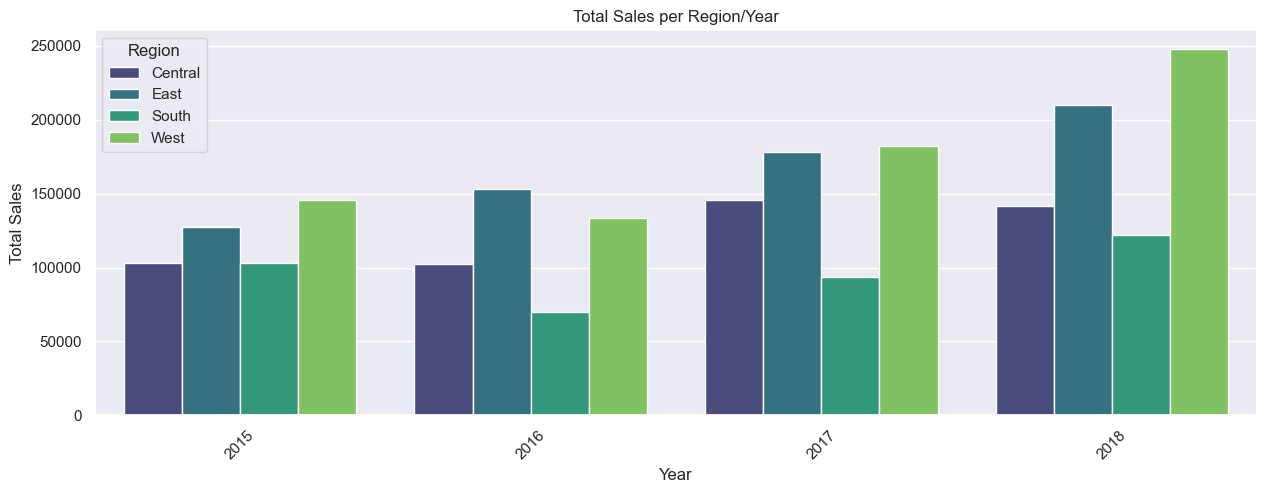

In [50]:
# Plotting total sales per region/year
plt.figure(figsize=(15, 5))
sns.barplot(
    data = trends, 
    x='year', 
    y='sales', 
    hue='region', 
    palette='viridis'
)
plt.title('Total Sales per Region/Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()



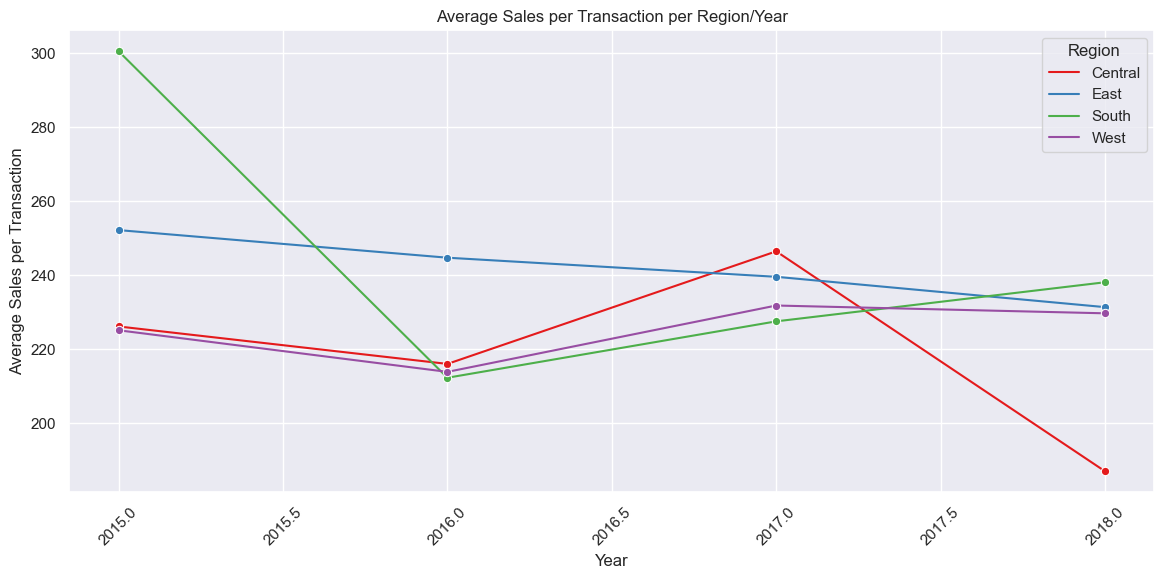

In [51]:
# Plotting average sales per transaction
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=region_year_describe, 
    x='year', 
    y='mean', 
    hue='region', 
    marker='o', 
    palette='Set1'
)
plt.title('Average Sales per Transaction per Region/Year')
plt.xlabel('Year')
plt.ylabel('Average Sales per Transaction')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()


# What are the top 10 performing Products and thier categories


In [52]:
#group by product name and calculate the sum of sales 
product_sales = df.groupby('product name')['sales'].sum().to_frame()

In [53]:
#reset index for product_sales
product_sales = product_sales.sort_values('sales').reset_index()
product_sales

,product name,sales
0,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
1,Avery 5,5.760
2,Xerox 20,6.480
3,Grip Seal Envelopes,7.072
4,Acme Serrated Blade Letter Opener,7.632
...,...,...
1844,GBC DocuBind TL300 Electric Binding System,19823.479
1845,HON 5400 Series Task Chairs for Big and Tall,21870.576
1846,Cisco TelePresence System EX90 Videoconferenci...,22638.480
1847,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384


In [54]:
#create a new column that stores the cumulative sum of sales
product_sales['sales_cumulative_sum'] = product_sales['sales'].cumsum()

In [55]:
#create a new column that stores the cumulatiive percentage
product_sales['sales_cumulative_percentage'] = 100 * product_sales['sales_cumulative_sum']/product_sales['sales'].sum()


In [56]:
#sort values
product_sales = product_sales.sort_values("sales", ascending = False)
product_sales

,product name,sales,sales_cumulative_sum,sales_cumulative_percentage
1848,Canon imageCLASS 2200 Advanced Copier,61599.824,2.261255e+06,100.000000
1847,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,2.199656e+06,97.275857
1846,Cisco TelePresence System EX90 Videoconferenci...,22638.480,2.172202e+06,96.061780
1845,HON 5400 Series Task Chairs for Big and Tall,21870.576,2.149564e+06,95.060634
1844,GBC DocuBind TL300 Electric Binding System,19823.479,2.127693e+06,94.093446
...,...,...,...,...
4,Acme Serrated Blade Letter Opener,7.632,2.856800e+01,0.001263
3,Grip Seal Envelopes,7.072,2.093600e+01,0.000926
2,Xerox 20,6.480,1.386400e+01,0.000613
1,Avery 5,5.760,7.384000e+00,0.000327


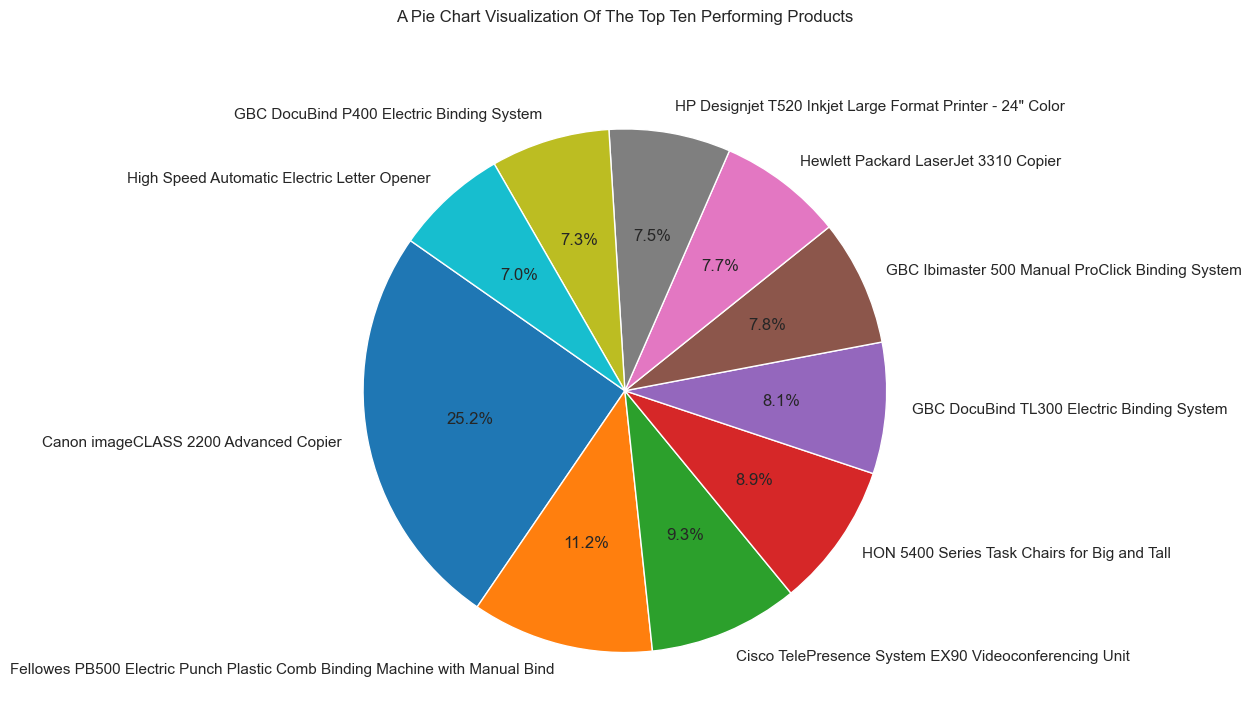

In [59]:
#pie chart plot
plt.figure(figsize = (15, 8.5))
plt.pie(
    product_sales['sales'][:10], 
    labels=product_sales['product name'][:10], 
    autopct='%1.1f%%', 
    startangle=145, 
    colors=sns.color_palette('tab10')
)
plt.title('A Pie Chart Visualization Of The Top Ten Performing Products', pad = 30)
plt.show()

Based on the descriptive statistics and lineplot provided about which examines the I was able to uncover the following insights:
The top ten performing products are 
1. Canon imageCLASS 2200 Advanced Copier form the copiers sub-category and Technology category   2. Fellowes PB500 Electric Punch Plastic Comb Biding machine with manual bind from the binders sub-category and office supplies category                
3. Cisco TelePresence System EX90 Videoconferenng unit from the machines subcategory and technology category
4. HON 5400 Series Task Chairs for Big and T from the Chairs sub-category and funiture category
 

5. GBC DocuBind TL300 Electric Binding Sy from the binders sub-category office supplies category

6. GBC Ibimaster 500 Manual ProClick Binding S from the binders sub-category office supplies category
 
7. Hewlett Packard LaserJet 3310  from the copiers sub-category technology category
 
8. 	HP Designjet T520 Inkjet Large Format P- 24th color from Printer the sub-category office supplies category

9.	GBC DocuBind P400 Electric Bindin from the binder sub-category office supplies category

10. High Speed Automatic Electric Lett from the supplies sub-category office supplies categner


# Analysis on the distribution of sales across customer segment

In [60]:
#descriptive analysis
customer_segment_describe = df.groupby('segment')['sales'].describe()
customer_segment_describe

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
Consumer,5101.0,225.065777,588.933757,0.444,17.28,53.982,208.560,13999.96
Corporate,2953.0,233.150720,600.111546,0.556,17.38,56.300,213.080,17499.95
Home Office,1745.0,243.381550,763.080644,0.990,17.05,52.440,211.248,22638.48


In [61]:
#group by segment, calculate the sum of sales, reset inde and sort values
customer_segment_sum = df.groupby('segment')['sales'].sum().reset_index().sort_values('sales')
customer_segment_sum

,segment,sales
2,Home Office,4.247008e+05
1,Corporate,6.884941e+05
0,Consumer,1.148061e+06


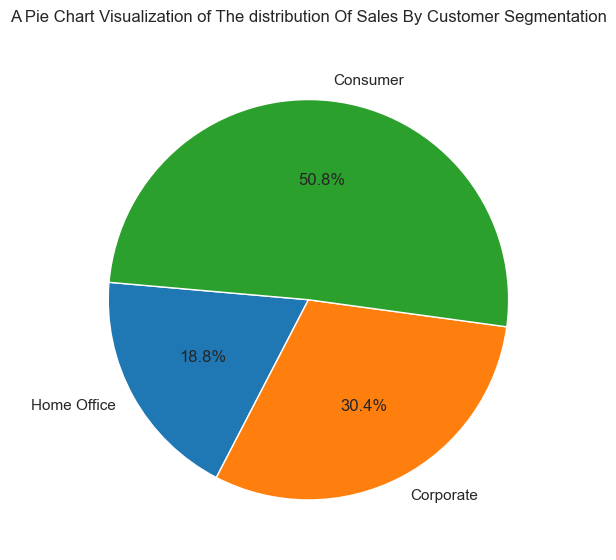

In [64]:
#pie chart plot
plt.figure(figsize = (15, 6.5))
plt.pie(
    customer_segment_sum['sales'], 
    labels = customer_segment_sum['segment'],
    autopct = '%1.1f%%',
    startangle = 175,
    colors = sns.color_palette('tab10')
)
plt.title("A Pie Chart Visualization of The distribution Of Sales By Customer Segmentation", pad = 20)
plt.show()

# Overview of Customer Segments


The data provides an analysis of sales performance across three customer segments:

1. Consumer

2. Corporate

3. Home Office

Each segment represents a distinct group of customers, and the analysis focuses on their contribution to overall sales and key distribution metrics.



# Key Findings from Descriptive Statistics
## Consumer Segment:

1. Accounts for the highest count of transactions (5,101 sales records), contributing significantly to overall sales.
   
2. The mean sales value is approximately 225.07, which is slightly below the Corporate and Home Office segments.
   
4. The maximum sales value in this segment reaches 13,999.96, indicating occasional high-value transactions.
   
5. This segment constitutes 50.8% of total sales, as highlighted in the pie chart.

## Corporate Segment:

1. Represents the second-largest customer group with 2,953 transactions.
   
2. The mean sales value is slightly higher than the Consumer segment, at 233.15, reflecting a focus on moderately higher-value purchases.
   
3. The maximum sales value is 17,499.95, suggesting some larger-scale purchases by corporate clients.

4. This segment contributes 30.4% to the total sales.

## Home Office Segment:

1. Is the smallest segment by transaction count (1,745 sales records) but shows the highest mean sales value of 243.38.

2. The maximum sales value in this segment is 22,638.48, which is the highest across all segments, indicating potential large-scale purchases or unique, high-value clients.

3. The segment contributes 18.8% of total sales.

## Visualization Insights
1. The pie chart clearly shows the dominance of the Consumer segment, which contributes over half of the total sales, followed by the Corporate segment (30.4%) and Home Office segment (18.8%).

2. The color-coding provides a visual understanding of the proportional contributions, emphasizing the importance of the Consumer and Corporate segments.

# Recommendations

## Based on the analysis:

### A. Focus on the Consumer Segment:

1. This segment generates the bulk of transactions and sales. Maintaining customer satisfaction and offering targeted promotions could sustain its dominance.

2. Explore opportunities to increase the average sales value, as the mean sales are slightly lower compared to other segments.

### B. Leverage the Corporate Segment:

1. The Corporate segment contributes a significant portion of sales with higher mean sales than the Consumer segment.

2. Consider introducing tailored corporate packages or volume-based discounts to maximize this segment's potential.

### C. Expand Opportunities in the Home Office Segment:

1. Despite having the lowest transaction count, this segment exhibits the highest mean and maximum sales values, indicating a niche but high-value clientele.

2. Focus on marketing efforts targeting small-scale businesses or home office setups to expand this segment further.


In [65]:
#descriptive analysis
df['order date'].dt.day.describe().to_frame()

,order date
count,9799.000000
mean,15.486070
std,8.753851
min,1.000000
25%,8.000000
50%,16.000000
75%,23.000000
max,31.000000


In [66]:
#create a new column that stores day of the month
df['order days'] = df['order date'].dt.day

In [67]:
#values count
order_day_counts = df['order days'].value_counts().to_frame()

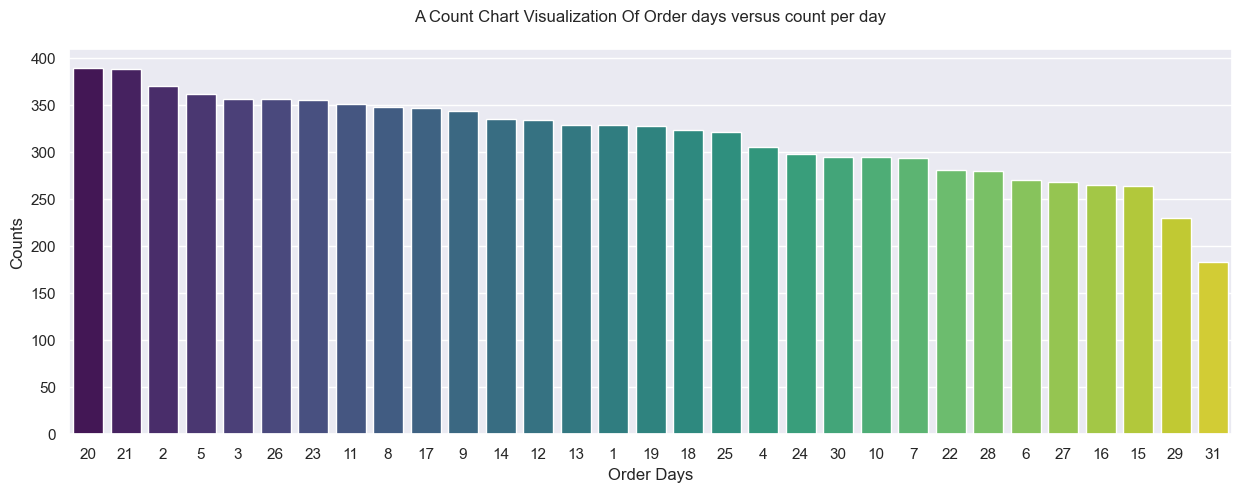

In [72]:
#Count plot
plt.figure(figsize= (15, 5))
sns.countplot(
    x = df['order days'],
    order = order_day_counts.index[:],
    palette = 'viridis'
)
plt.title('A Count Chart Visualization Of Order days versus count per day', pad = 20)
plt.xlabel('Order Days')
plt.ylabel('Counts')
plt.show()

The analysis and visualization reveals that the average day of the month for orders is approximately 15th. This suggests that orders are evenly distributed throughout the month, slightly leaning toward the middle of the month. Days 20th and 21st are particularly significant for order activity, representing potential opportunities for businesses to maximize sales during this peak period. Conversely, Days 31, 15, and 16 represent periods of lower customer activity, which could indicate potential lulls in business performance.

# Recommendations:
## Leverage Peak Days:

Introduce promotional campaigns or discounts around the 20th and 21st to further capitalize on customer engagement during this high-activity period.

## Boost Low Days:

Investigate why activity is lower on Days 15, 16, and 31. Consider launching targeted offers or marketing efforts to drive sales on these days.

## Operational Efficiency:

Ensure adequate staffing and inventory to handle the increased demand around peak order days (especially the 20th and 21st).
This analysis can help businesses strategize and optimize operations and marketing for maximum impact.








# Analysis on shipment time 

In [73]:
#create a new column called shipping time that stores the differences betweeen ship date and order date
df['shipping_time'] = (df['ship date'] - df['order date']).dt.days

In [74]:
#descriptive analysis
df['shipping_time'].describe().to_frame()

,shipping_time
count,9799.000000
mean,3.961118
std,1.749703
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


. The descriptive analysis above shows that the average time it takes for a shipment to be delivered to a client is approximately 4 days from the order day

. A standard deviation of 1.74 showws a close consistency and viability around the mean suggesting that the shipping time are greatly clustered around the mean with a maximum length of 7 days before orders are been received by customers 

. The minimum shipping time here shows 0 suggesting that the som orders take less than a day to be delivered to customers showing good time keeping 

Quartiles

The 25th percentile (3): This shows that 25 percentage of goods are shipped within 3 days from the order day

The 50th percentile (4): The median shipping time takes 4 days agreeing with the mean that on an average it takes 4 days for goods to be delivered to customers from order day

The 75th percentile (5): 75 percentage of goods get delivered within 5 days from order day just one day above average 

The quartiles agree with the standard deviation showing that the number of days for a successful shipment are very close to the average time or days it takes for goods to be delivered

In [75]:
#value count
shipping_time_count = df['shipping_time'].value_counts().to_frame()
shipping_time_count

,count
shipping_time,
4,2717
5,2147
2,1295
6,1170
3,978
7,615
0,514
1,363


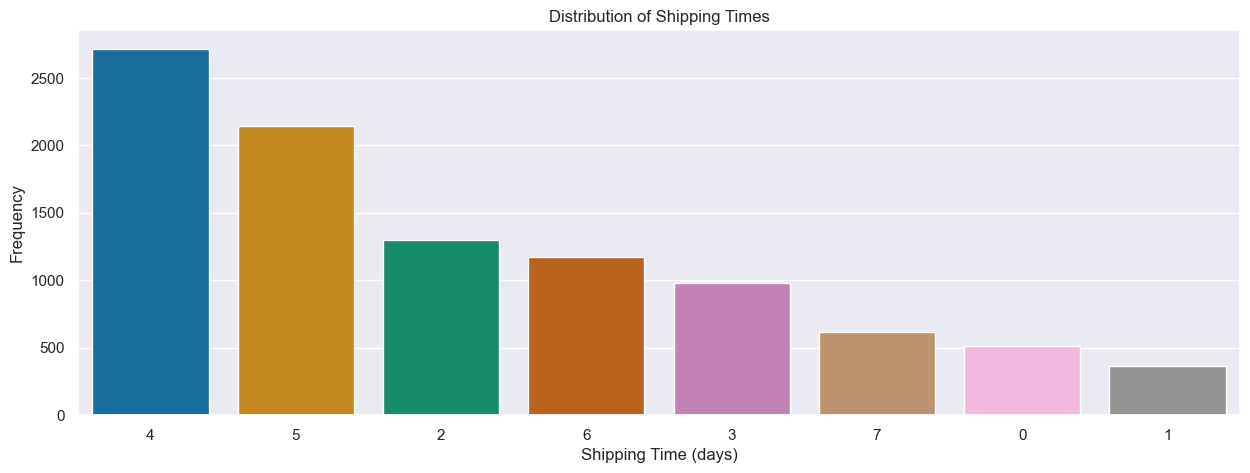

In [76]:
plt.figure(figsize = (15, 5))
# this lines of code plots a countplot of shipping times
sns.countplot(
    x = df['shipping_time'], 
    order = shipping_time_count.index[:],
    palette = 'colorblind'
)
plt.title('Distribution of Shipping Times')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Frequency')
plt.show()


The analysis and count plot above reveals that on an average it shipping time is 4 days while it takes 3 days as shipping time to get 25 percentage of goods to be delivered to customers, 5 days to deliver 75 percentage of goods and less than 25 percentage of ordered goods take lesser time (a few days to 2 days) to be shipped to customers.

Recommendations 

More investigations should be made to identify why it takes more days for goods to be delivered and possibly find solution to this thus reducing the number of days it will take for a successful shipment as this may grow the customer size due to fast deliveries

# What is the probability of shipping time for goods to last more than 7 days if the average number of days is 4?

In [77]:
#calculate the probability
prob_of_7days = 1 - expon.cdf(7, scale = 4)
print(f'The probability of shipping time for goods to last more than 7 with an average shipping time of 4 days is {(prob_of_7days * 100 ).round(1)}%')

The probability of shipping time for goods to last more than 7 with an average shipping time of 4 days is 17.4%


# what's the probability of shipping times for goods to be less than the average time which is 4 days?

In [78]:
#calculate the probability
prob_of_lessmean = expon.cdf(4, scale = 4)
print(f'The probability of shipping time for goods to last less than the average shipping time of 4 days is {(prob_of_lessmean * 100 ).round(1)}%')

The probability of shipping time for goods to last less than the average shipping time of 4 days is 63.2%
